# Declaration of Originality

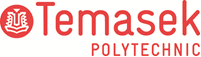

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Coen Ng Zhexian (2400400D)
* Tutorial Group                :  P04
* Tutor						    :  Mr Emilie Sebastian
* Submission Date               : 11/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [2]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [3]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'Singapore Public Housing Resale Flat Prices from 2017 to 2023.csv'
df = pd.read_csv(FILE_PATH)
df

,month,town,public_housing_flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price_Singapore_dollars
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
155816,2023-06,YISHUN,5 ROOM,511B,YISHUN ST 51,10 TO 12,113.0,Improved,2017,93 years 03 months,645000.0
155817,2023-06,YISHUN,5 ROOM,513A,YISHUN ST 51,07 TO 09,120.0,3Gen,2018,93 years 09 months,685000.0
155818,2023-06,YISHUN,5 ROOM,613,YISHUN ST 61,01 TO 03,121.0,Improved,1987,62 years 11 months,565000.0
155819,2023-06,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,143.0,Apartment,1987,63 years 04 months,845000.0


## 2.2 Summary Statistics

In [4]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155821 entries, 0 to 155820
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   month                           155821 non-null  object 
 1   town                            155821 non-null  object 
 2   public_housing_flat_type        155821 non-null  object 
 3   block                           155821 non-null  object 
 4   street_name                     155821 non-null  object 
 5   storey_range                    155821 non-null  object 
 6   floor_area_sqm                  155821 non-null  float64
 7   flat_model                      155821 non-null  object 
 8   lease_commence_date             155821 non-null  int64  
 9   remaining_lease                 155821 non-null  object 
 10  resale_price_Singapore_dollars  155821 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.1+ MB


In [5]:
## Check for missing data
df.isna().sum()

month                             0
town                              0
public_housing_flat_type          0
block                             0
street_name                       0
storey_range                      0
floor_area_sqm                    0
flat_model                        0
lease_commence_date               0
remaining_lease                   0
resale_price_Singapore_dollars    0
dtype: int64

In [6]:
## Describe data distribution
df.describe(include="all")

,month,town,public_housing_flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price_Singapore_dollars
count,155821,155821,155821,155821,155821,155821,155821.000000,155821,155821.000000,155821,1.558210e+05
unique,78,26,7,2664,564,17,NaN,21,NaN,664,NaN
top,2021-08,SENGKANG,4 ROOM,2,YISHUN RING RD,04 TO 06,NaN,Model A,NaN,94 years 10 months,NaN
freq,2739,13099,65377,489,2295,35878,NaN,52879,NaN,1436,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,97.477862,NaN,1995.668087,NaN,4.835541e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,24.046407,NaN,13.823952,NaN,1.671764e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,1966.000000,NaN,1.400000e+05
25%,NaN,NaN,NaN,NaN,NaN,NaN,82.000000,NaN,1985.000000,NaN,3.600000e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,94.000000,NaN,1996.000000,NaN,4.515000e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,113.000000,NaN,2008.000000,NaN,5.750000e+05


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

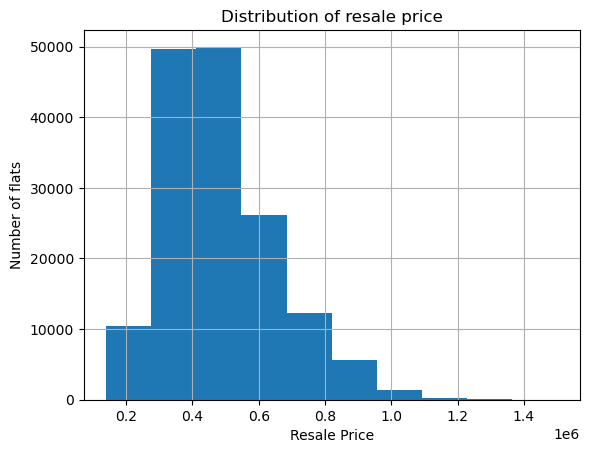

In [7]:
## Understanding distribution of target
col_y = 'resale_price_Singapore_dollars'

##Plot histogram
df[col_y].hist()
plt.title(f"Distribution of resale price")
plt.suptitle('')
plt.xlabel('Resale Price')
plt.ylabel('Number of flats')
plt.show()

The number of flats are mostly sold at the resale price of around 0.3 - 0.5.

### 2.3.1.2 Understanding distribution of features

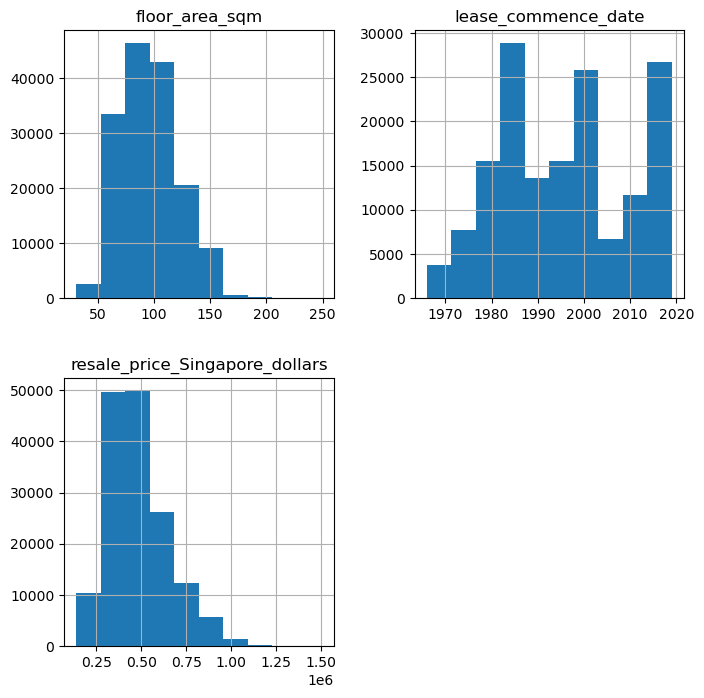

In [8]:
## Understanding distribution of features
df.hist(figsize=(8,8))
plt.show()

More flats with a larger floor area are being resold, most notably between 50s square metres to about 125 square metres.
There are 3 significant periods where the number of resale units were above 25000. Those periods were between 1980-1990, about 1995-2005, and around 2015 to before 2020.


### 2.3.2 Understanding relationship between variables

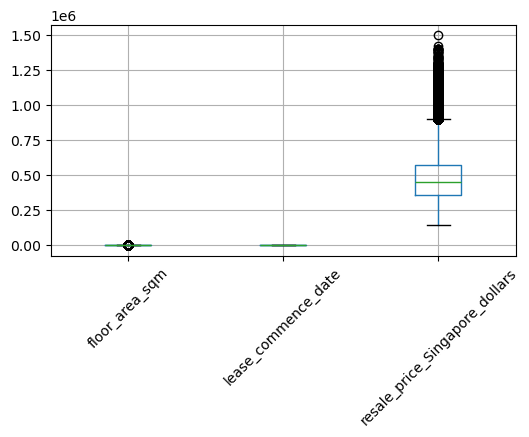

In [9]:
## Understanding relationship between variables

## Boxplot
df.boxplot(rot=45, figsize=(6,3))
plt.show()

## 

# 3. Data Preparation

## 3.1 Data Cleaning

In [10]:
## Clean data

## 3.2 Train-Test Split

In [11]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [12]:
## Initialise and train model


# 5. Model Evaluation

In [13]:
## Evaluate model


In [14]:
## New data

## Predict


## Iterative model development


In [15]:
## Further feature engineering / feature selection